In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

In [3]:
df = pd.read_csv('data/Claims.csv')
df.columns

Index(['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year', 'Specialty',
       'PlaceSvc', 'PayDelay', 'LengthOfStay', 'DSFS', 'PrimaryConditionGroup',
       'CharlsonIndex', 'ProcedureGroup', 'SupLOS'],
      dtype='object')

In [4]:
df.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [5]:
df.shape

(2668990, 14)

In [6]:
df.describe()

,MemberID,ProviderID,Vendor,PCP,SupLOS
count,2.668990e+06,2.652726e+06,2.644134e+06,2.661498e+06,2.668990e+06
mean,4.998824e+07,5.070900e+06,3.806974e+05,5.133819e+04,4.245801e-03
std,2.892240e+07,2.868035e+06,2.729317e+05,2.920591e+04,6.502135e-02
min,4.000000e+00,4.720000e+02,3.900000e+01,7.400000e+01,0.000000e+00
25%,2.480119e+07,2.467684e+06,1.526100e+05,2.746700e+04,0.000000e+00
50%,4.992606e+07,5.442161e+06,2.518090e+05,4.799000e+04,0.000000e+00
75%,7.532789e+07,7.053364e+06,5.885440e+05,7.587600e+04,0.000000e+00
max,9.999882e+07,9.999241e+06,9.998740e+05,9.990500e+04,1.000000e+00


In [7]:
df.dtypes

MemberID                   int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                      object
Specialty                 object
PlaceSvc                  object
PayDelay                  object
LengthOfStay              object
DSFS                      object
PrimaryConditionGroup     object
CharlsonIndex             object
ProcedureGroup            object
SupLOS                     int64
dtype: object

In [8]:
def count_nulls(df):
    null_counter = df.isnull().sum(axis=0)
    null_counter = null_counter[null_counter > 0]
    null_percent = df.isnull().sum(axis=0) / df.shape[0] * 100
    null_percent = null_percent[null_percent > 0]
    null_df = pd.concat([null_counter,null_percent],axis=1)
    null_df.columns = ['count','percent']
    display(null_df)

In [9]:
count_nulls(df)

,count,percent
ProviderID,16264,0.609369
Vendor,24856,0.931289
PCP,7492,0.280705
Specialty,8405,0.314913
PlaceSvc,7632,0.285951
LengthOfStay,2597392,97.317412
DSFS,52770,1.977152
PrimaryConditionGroup,11410,0.427503
ProcedureGroup,3675,0.137693


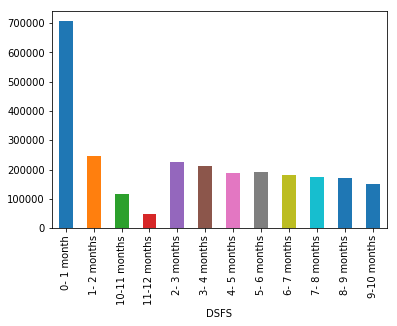

In [10]:
df.groupby(['DSFS']).size().plot.bar()

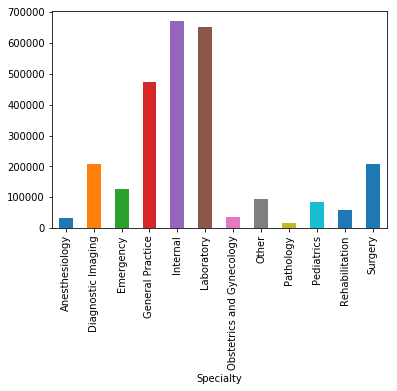

In [11]:
df.groupby(['Specialty']).size().plot.bar()

In [12]:
df.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


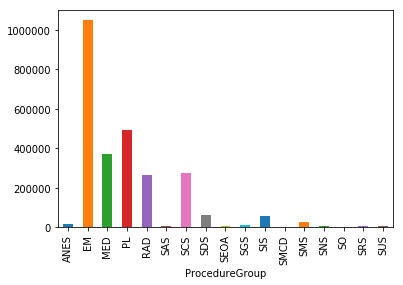

In [13]:
df.groupby(['ProcedureGroup']).size().plot.bar()

In [14]:
df['PCP'].fillna((df['PCP'].mean()), inplace=True)

C:\Users\duy.truong\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


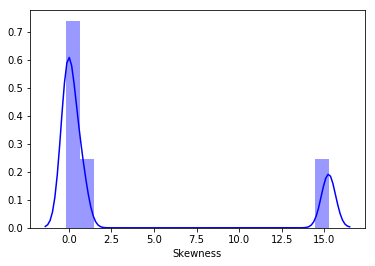

In [16]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')